In [1]:
! pip install selenium

     |████████████████████████████████| 904 kB 2.7 MB/s eta 0:00:01


In [3]:
! pip install beautifulsoup4

In [81]:
from selenium import webdriver
import bs4 as bs
from bs4 import NavigableString 
import pandas as pd
import urllib.request

## Avoir toutes les expansions (pas encore formatter) 

In [281]:
source = urllib.request.urlopen('https://www.cardmarket.com/en/Magic/Products/Singles').read()
soup = bs.BeautifulSoup(source,'lxml')


In [231]:
source = urllib.request.urlopen('https://www.cardmarket.com/en/Magic/Products/Singles').read()
soup = bs.BeautifulSoup(source,'lxml')

end_url_by  = "?idRarity=0&perSite=20"

start_expension_by = "BagsExpansionAll"
finish_expension_by = "NameExact"

all_expansions = soup.text[soup.text.find(start_expension_by):soup.text.find(finish_expension_by)][len(start_expension_by):]

## Expansion magic 2015, getting all card urls 

In [311]:
pages = ([str(i) for i in range(0,15)])
list_of_links = []

for page in pages: 
    base_link = 'https://www.cardmarket.com/en/Magic/Products/Singles/Magic-2015?idCategory=1&idExpansion=1485&idRarity=0&site='
    source = urllib.request.urlopen(base_link + page).read()
    soup = bs.BeautifulSoup(source, 'lxml')
    for link in soup.find_all('a', href=True):
        if "Magic-2015/" in link['href']:
            list_of_links.append(link['href']) 

In [329]:
df = pd.DataFrame()

for link in list_of_links:
    url = "https://www.cardmarket.com/" + link
    source = urllib.request.urlopen(url).read()
    soup = bs.BeautifulSoup(source,'lxml')

    start_dates = '{"type":"line","data":{"labels":['
    end_dates = '],"datasets":[{"label":"Avg. Sell Price","data":['

    start_vals = '"label":"Avg. Sell Price","data":['
    end_vals = '],"backgroundColor"'

    dates = soup.text[int(soup.text.find(start_dates)): int(soup.text.find(end_dates))][len(start_dates):].split(',')
    price = soup.text[int(soup.text.find(start_vals)): int(soup.text.find(end_vals))][len(start_vals):].split(',')

    temp = pd.DataFrame()

    temp['dates'] = pd.to_datetime(pd.Series(dates).apply(lambda x: x[1:-1]), format="%d.%m.%Y")
    temp['price'] = pd.Series(price).apply(lambda x: float(x))
    temp['card'] = pd.Series([url.split('/')[-1] for i in range(temp.shape[0])])
    df = pd.concat([df, temp])

In [335]:
df

,dates,price,card
0,2020-04-18,0.42,Elvish-Mystic
1,2020-04-19,0.25,Elvish-Mystic
2,2020-04-20,0.33,Elvish-Mystic
3,2020-04-21,0.58,Elvish-Mystic
4,2020-04-22,0.26,Elvish-Mystic
...,...,...,...
25,2020-05-14,5.85,Chord-of-Calling
26,2020-05-15,6.57,Chord-of-Calling
27,2020-05-16,6.35,Chord-of-Calling
28,2020-05-17,6.34,Chord-of-Calling


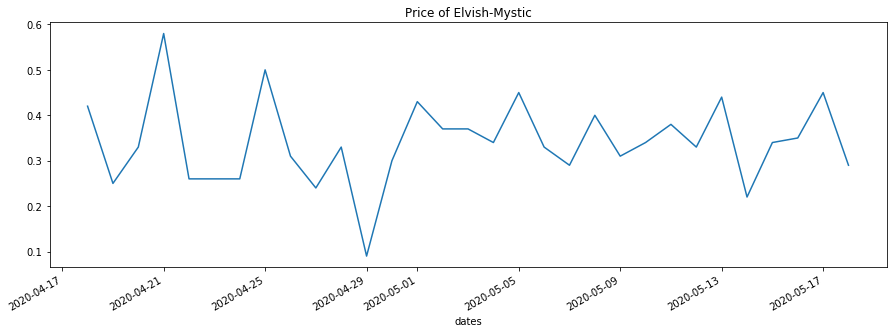

In [344]:
card = df.card.unique()[0]
df[df['card'] == card].set_index('dates')['price'].plot(figsize=(15,5), title='Price of '+ card);

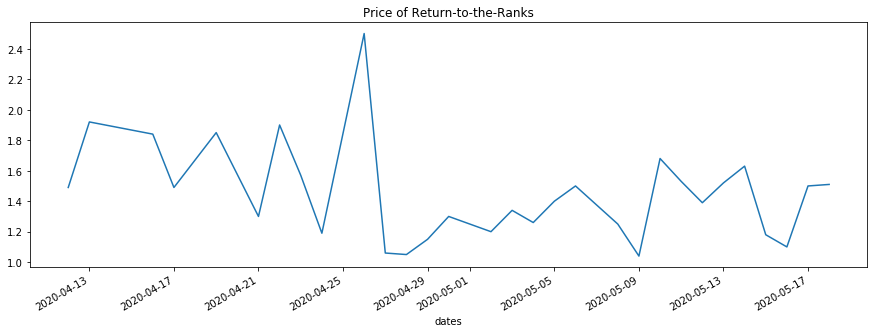

In [345]:
card = df.card.unique()[1]
df[df['card'] == card].set_index('dates')['price'].plot(figsize=(15,5), title='Price of '+ card);

In [ ]:
card = df.card.unique()[2]
df[df['card'] == card].set_index('dates')['price'].plot(figsize=(15,5), title='Price of '+ card);